In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator

mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

frame = pd.read_csv("/content/energydatacomplete.csv")

In [9]:
frame.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [11]:
frame[['date','T_out', 'RH_2', 'Appliances','lights']]

,date,T_out,RH_2,Appliances,lights
0,2016-01-11 17:00:00,6.600000,44.790000,60,30
1,2016-01-11 17:10:00,6.483333,44.722500,60,30
2,2016-01-11 17:20:00,6.366667,44.626667,50,30
3,2016-01-11 17:30:00,6.250000,44.590000,50,40
4,2016-01-11 17:40:00,6.133333,44.530000,60,40
...,...,...,...,...,...
19730,2016-05-27 17:20:00,22.733333,42.025714,100,0
19731,2016-05-27 17:30:00,22.600000,42.080000,90,0
19732,2016-05-27 17:40:00,22.466667,42.768571,270,10
19733,2016-05-27 17:50:00,22.333333,43.036000,420,10


In [12]:
frame['date'] = pd.to_datetime(frame['date'], infer_datetime_format=True)

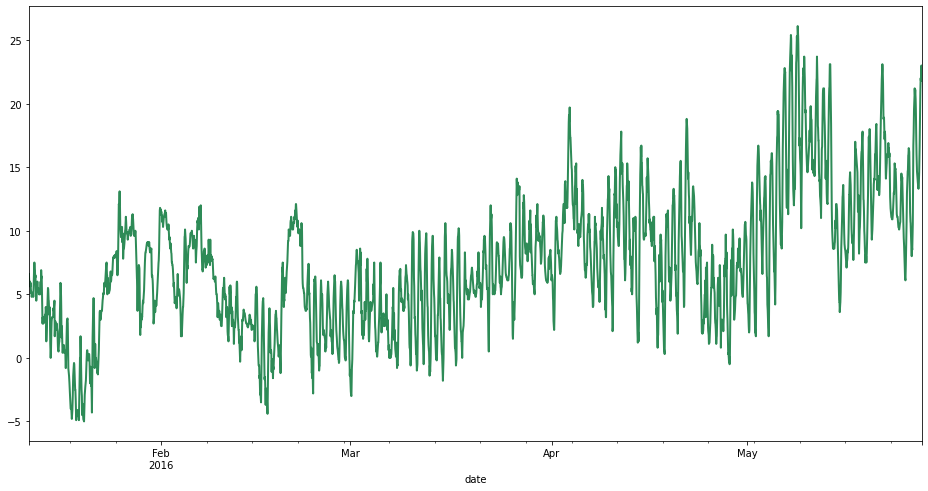

In [13]:
frame.set_index('date')['T_out'].plot(color="seagreen", linewidth=2.0)

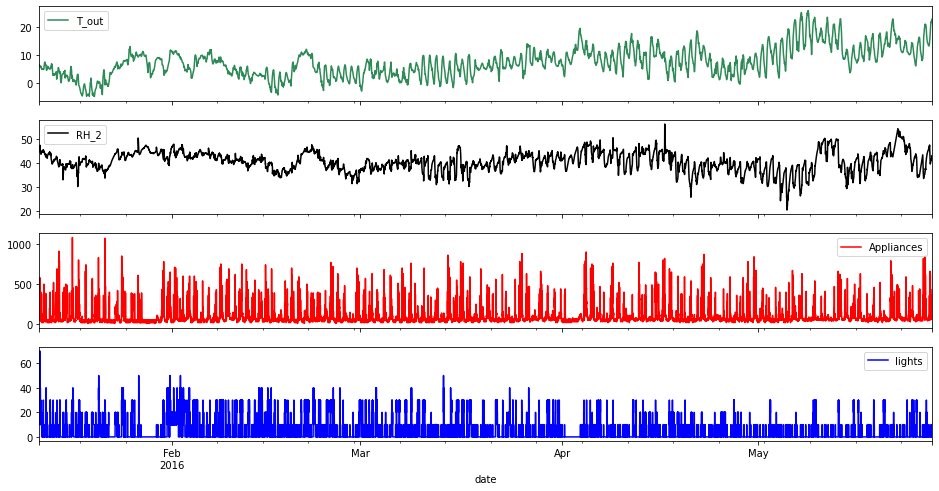

In [15]:
frame.set_index('date')[['T_out', 'RH_2', 'Appliances','lights']].plot(subplots=True, color=['seagreen', "black", "red", "blue"])
plt.show()

In [16]:
frame.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

In [17]:
features=frame[['Appliances','T_out', 'RH_2']].to_numpy().tolist()
target=frame['Appliances'].tolist()

In [18]:
features[0:11]

[[60.0, 6.6, 44.79],
 [60.0, 6.48333333333333, 44.7225],
 [50.0, 6.36666666666667, 44.6266666666667],
 [50.0, 6.25, 44.59],
 [60.0, 6.133333333333329, 44.53],
 [50.0, 6.01666666666667, 44.5],
 [60.0, 5.9, 44.5],
 [60.0, 5.91666666666667, 44.5],
 [60.0, 5.93333333333333, 44.433333333333294],
 [70.0, 5.95, 44.4],
 [230.0, 5.96666666666667, 44.4]]

In [19]:
target[0:11]

[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

In [21]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)

In [22]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]), array([60]))

In [23]:
ts_generator[0][0][0].shape

(6, 3)

In [24]:
ts_generator[1]

(array([[[60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ]]]), array([60]))

In [25]:
ts_generator[2]

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]), array([60]))

In [26]:
len(ts_generator)

19729

In [27]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1, stride=2)

In [28]:
len(ts_generator)

9865

In [29]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]), array([60]))

In [30]:
ts_generator[1]

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]), array([60]))

In [31]:
pd.concat([frame['Appliances'],frame['Appliances'].shift(-1), frame['Appliances'].shift(-2)],axis=1)

,Appliances,Appliances,Appliances
0,60,60.0,50.0
1,60,50.0,50.0
2,50,50.0,60.0
3,50,60.0,50.0
4,60,50.0,60.0
...,...,...,...
19730,100,90.0,270.0
19731,90,270.0,420.0
19732,270,420.0,430.0
19733,420,430.0,NaN


In [32]:
multi_target=pd.concat([frame['Appliances'],frame['Appliances'].shift(-1), frame['Appliances'].shift(-2)],axis=1).dropna().to_numpy().tolist()

In [33]:
multi_target[0:13]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0],
 [230.0, 580.0, 430.0],
 [580.0, 430.0, 250.0],
 [430.0, 250.0, 100.0]]

In [34]:
ts_generator = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

In [35]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]), array([[60., 60., 60.]]))

In [36]:
ts_generator[1]

(array([[[ 60.        ,   5.9       ,  44.5       ],
         [ 60.        ,   5.91666667,  44.5       ],
         [ 60.        ,   5.93333333,  44.43333333],
         [ 70.        ,   5.95      ,  44.4       ],
         [230.        ,   5.96666667,  44.4       ],
         [580.        ,   5.98333333,  44.4       ]]]),
 array([[430., 250., 100.]]))